In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import pyfolio as pf
import empyrical as ep
from yahoofinancials import YahooFinancials
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
import seaborn as sns

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 200
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
risky_assets = ['NIO', 'TSLA', 'WKHS', 'NKLA', 'AAPL','NVDA','MSFT']
yahoo_financials = YahooFinancials(risky_assets)
data = yahoo_financials.get_historical_price_data('2020-01-01', '2020-08-31', 'daily')

prices_df = pd.DataFrame({
    asset: {x['formatted_date']: x['adjclose'] for x in data[asset]['prices']} for asset in risky_assets
})
prices_df.head()

,NIO,TSLA,WKHS,NKLA,AAPL,NVDA,MSFT
2020-01-02,3.72,86.052002,3.07,10.320,74.573036,239.657211,159.352386
2020-01-03,3.83,88.601997,3.07,10.300,73.848030,235.821274,157.368179
2020-01-06,3.68,90.307999,3.21,10.320,74.436470,236.810211,157.774948
2020-01-07,3.24,93.811996,3.29,10.330,74.086395,239.677200,156.336395
2020-01-08,3.39,98.428001,3.39,10.342,75.278160,240.126724,158.826569


In [ ]:
avg_returns = expected_returns.mean_historical_return(prices_df)
cov_mat = risk_models.sample_cov(prices_df)

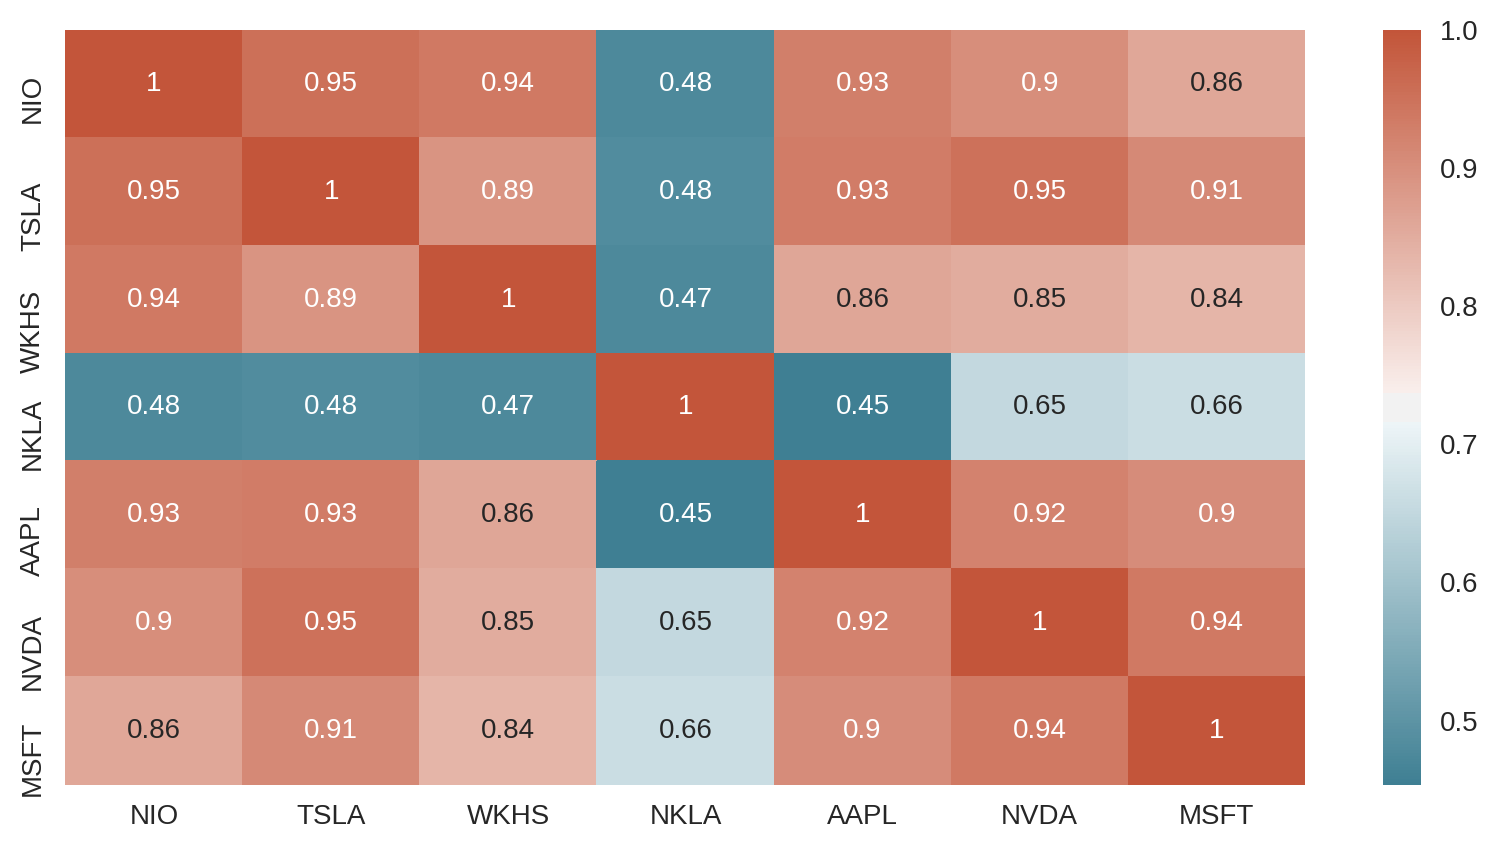

In [ ]:
corr = prices_df.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [ ]:
ef = EfficientFrontier(avg_returns, cov_mat)
weights = ef.max_sharpe()
#weights = ef.min_volatility()
cleaned_weights = ef.clean_weights()
ef.portfolio_performance(verbose=True)

Expected annual return: 1102.9%
Annual volatility: 77.3%
Sharpe Ratio: 14.24


(11.028849378594572, 0.7728982583433367, 14.243594496113127)

In [ ]:
cleaned_weights

OrderedDict([('NIO', 0.20652),
             ('TSLA', 0.49908),
             ('WKHS', 0.27875),
             ('NKLA', 0.01565),
             ('AAPL', 0.0),
             ('NVDA', 0.0),
             ('MSFT', 0.0)])

In [ ]:
latest_prices = get_latest_prices(prices_df)
weights = cleaned_weights 
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=14500)
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'NIO': 162, 'TSLA': 16, 'WKHS': 247, 'NKLA': 6}
Funds remaining: $123.69
